[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana5/1_Ruido_y_SeriesDeTiempo.ipynb)

# Dependencias

In [ ]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

# Función auxiliar

In [ ]:
def genera_puntos_regresion(m, b, sigma, size=10):
    '''genera coordenadas en x y y de puntos aleatorios
    en regresión.
    m: pendiente
    b: ordenada al origen
    sigma: desviación estándar de errores gaussianos
    size: cantidad de puntos a generar'''

    errors = 0
    xdata = np.linspace(-1.0,1.0,size)
    errors = np.random.normal(0, sigma, size)
    ydata = m * xdata + b + errors

    return xdata, ydata

In [ ]:
help(genera_puntos_regresion)

Help on function genera_puntos_regresion in module __main__:

genera_puntos_regresion(m, b, sigma, size=10)
    genera coordenadas en x y y de puntos aleatorios
    en regresión.
    m: pendiente
    b: ordenada al origen
    sigma: desviación estándar de errores gaussianos
    size: cantidad de puntos a generar



In [ ]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



# Simulación de puntos en 2d a partir de la ecuación de una recta

## Sin Ruido

In [ ]:
m = 0.5
b = 0
sigma = 0

una_variable = genera_puntos_regresion(m, b, sigma, size=10)

In [ ]:
una_variable

(array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
         0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ]),
 array([-0.5       , -0.38888889, -0.27777778, -0.16666667, -0.05555556,
         0.05555556,  0.16666667,  0.27777778,  0.38888889,  0.5       ]))

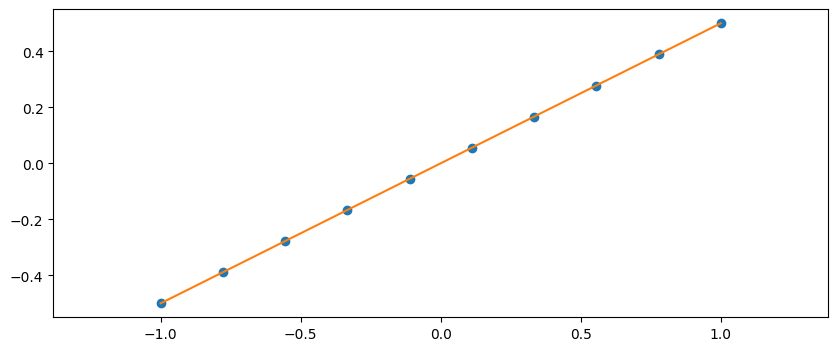

In [ ]:
m = 0.5
b = 0
sigma = 0

xs, ys = genera_puntos_regresion(m, b, sigma, size=10)

fig = plt.figure(figsize = (10, 4))
plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)

plt.axis('equal')
plt.show()

## Con Ruido

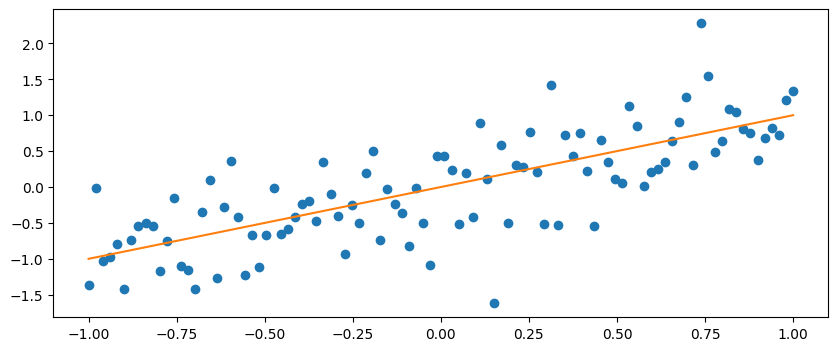

In [ ]:
m = 1
b = 0
sigma = 0.5

fig = plt.figure(figsize = (10, 4))
xs, ys = genera_puntos_regresion(m, b, sigma, size=100)

plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)
plt.show()

<Axes: ylabel='Frequency'>

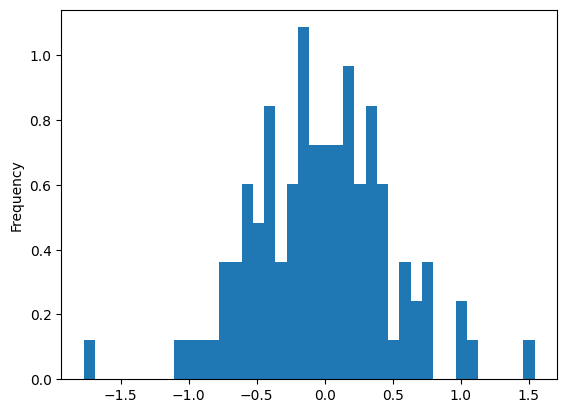

In [ ]:
errores = ys -  m * xs + b
pd.Series(errores).plot.hist(bins=40, density = True)

# Simulación de Ruido blanco

### iid (independiente e identicamente distribuido)

In [ ]:
np.random.normal(0, 1, 10)

array([ 0.33172066,  0.03685206,  1.19290983, -0.8310366 ,  0.18283941,
        0.27784086, -0.93140477, -1.76307246, -0.20955668,  1.71500907])

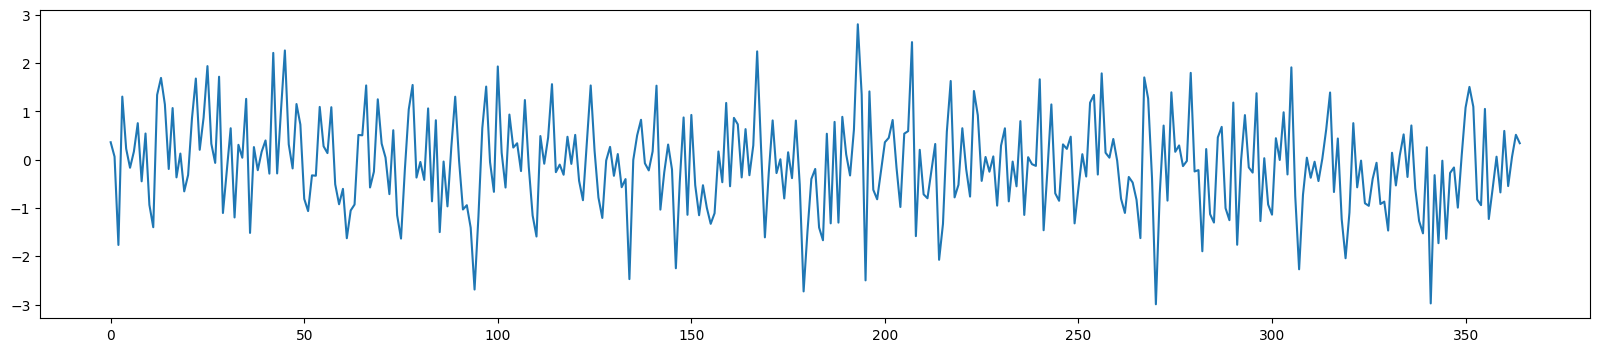

In [ ]:
media = 0
std = 1
num_muestras = 365
ruido_blanco = pd.Series(np.random.normal(media, std, num_muestras))

ruido_blanco.plot(figsize = (20,4))
plt.show()

<Axes: ylabel='Frequency'>

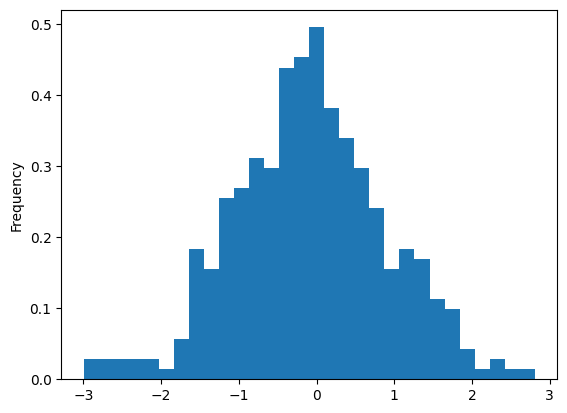

In [ ]:
ruido_blanco.plot.hist(bins=30, density=True)

### Otros tipos ruidos blancos

####Ejemplo 1

1) Sea $X_t$ un proceso iid y $Y$ una variable aleatoria con distribución Bernoulli con $p = 0.05$

Entonces la variable aleatoria

$Z_t= X_t~Y- X_t(Y-1)^2$ es un ruido blanco

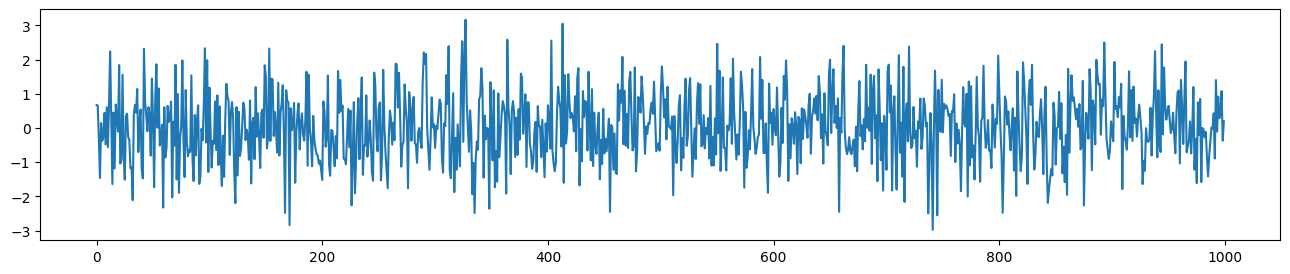

In [ ]:
num_muestras = 1000
X_t = pd.Series(np.random.normal(size= num_muestras))
Y = pd.Series(np.random.binomial(1, p = 0.05, size = num_muestras))
Z_t = (X_t * Y) - X_t*pow((Y - 1),2)

Z_t.plot(figsize = (16,3))
plt.show()

<Axes: ylabel='Frequency'>

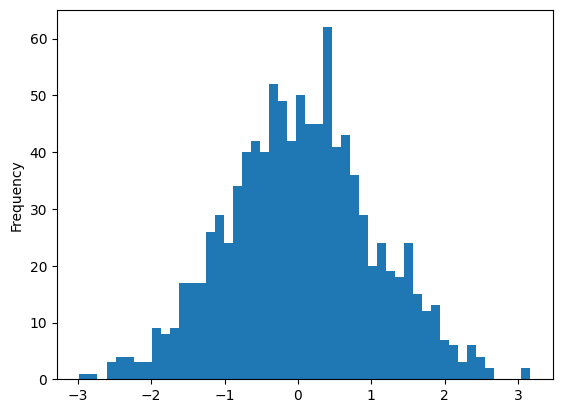

In [ ]:
Z_t.plot.hist(bins=50)

## EJERCICIO: ¿Pueden pensar en un proceso que tenga como parte de el al ruido blanco, pero que no sea un ruido blanco?  
Es decir, $X_t$ es ruido blanco, pero
$$ f(X_t) $$
no es un ruido blanco.

RESPUESTA:
$$ f(X_t) = 5t + X_t $$


In [ ]:
def funcion(ruido_blanco):
  '''transformacion'''
  x = np.linspace(0,10,len(ruido_blanco))
  y = 5*x + ruido_blanco
  return y

y_aux = funcion(ruido_blanco)

(array([26., 39., 38., 38., 42., 34., 38., 36., 44., 30.]),
 array([-1.49110162,  3.69592138,  8.88294438, 14.06996737, 19.25699037,
        24.44401337, 29.63103637, 34.81805937, 40.00508237, 45.19210536,
        50.37912836]),
 <BarContainer object of 10 artists>)

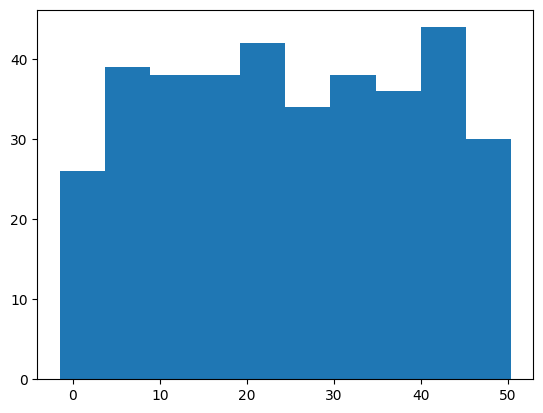

In [ ]:
plt.hist(y_aux)

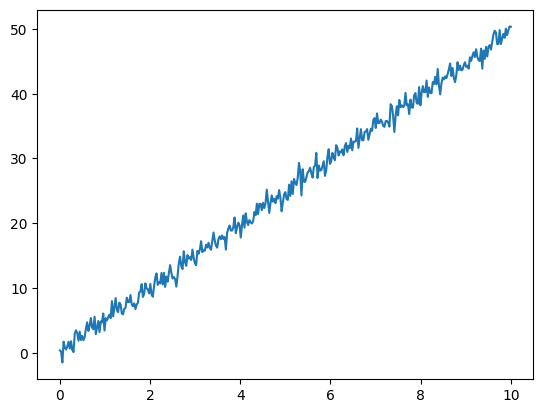

In [ ]:
plt.plot(np.linspace(0,10,len(ruido_blanco)), y_aux)

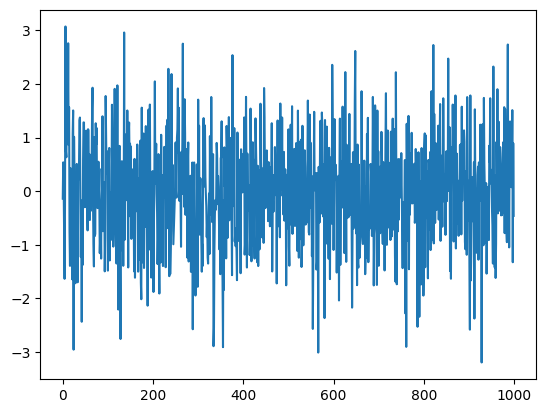

In [ ]:
ruido_blanco = np.random.normal(0,1,1000)
plt.plot(ruido_blanco)

# Simulación de un proceso autorregresivo  (AR)

$$ x_t = \alpha_{(t-1)} x_{(t-1)} + \alpha_{(t-2)} x_{(t-2)} + \beta_{(t-1)} \epsilon_{(t-1)}$$

AR: 2 lags \\
MA: 1 lag

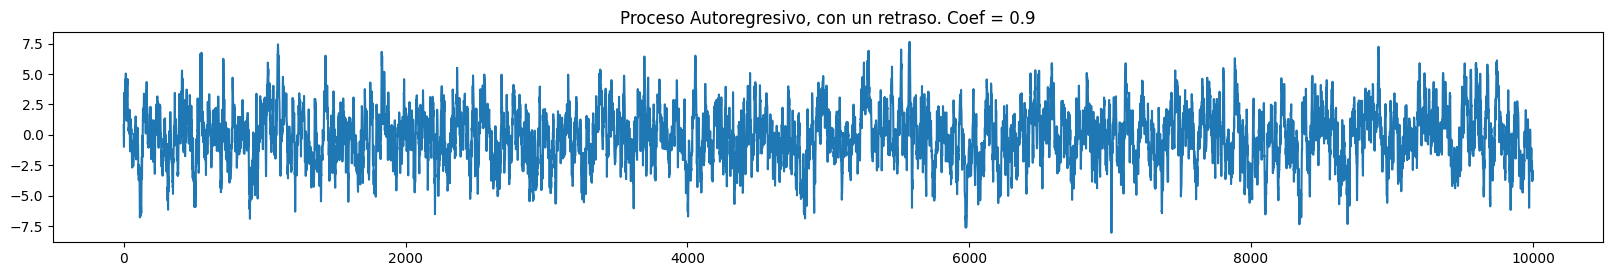

In [ ]:
coef = 0.9
plt.subplot(2,1,1)
ar = np.array([1, - coef])
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)
plt.rc("figure", figsize=(20,4))


AR_simulacion = pd.Series(AR_model.generate_sample(nsample=10000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

(array([0.000319  , 0.00063801, 0.00127601, 0.00191402, 0.00446605,
        0.00510405, 0.00638007, 0.00510405, 0.01371714, 0.01499316,
        0.03030532, 0.03190034, 0.03923741, 0.0478505 , 0.05391157,
        0.07815582, 0.0851739 , 0.08102685, 0.10176207, 0.13015337,
        0.13844746, 0.15950168, 0.16332972, 0.17034779, 0.1802369 ,
        0.17258082, 0.17959889, 0.18342693, 0.15120759, 0.14450852,
        0.14004247, 0.12696334, 0.11643623, 0.08995895, 0.07911283,
        0.05805861, 0.05104054, 0.0379614 , 0.0283913 , 0.02041621,
        0.02105422, 0.01020811, 0.00893209, 0.00606106, 0.00446605,
        0.00414704, 0.00510405, 0.00287103, 0.00127601, 0.00095701]),
 array([-8.0298619 , -7.71638558, -7.40290925, -7.08943292, -6.7759566 ,
        -6.46248027, -6.14900395, -5.83552762, -5.5220513 , -5.20857497,
        -4.89509864, -4.58162232, -4.26814599, -3.95466967, -3.64119334,
        -3.32771701, -3.01424069, -2.70076436, -2.38728804, -2.07381171,
        -1.76033539, -1.44

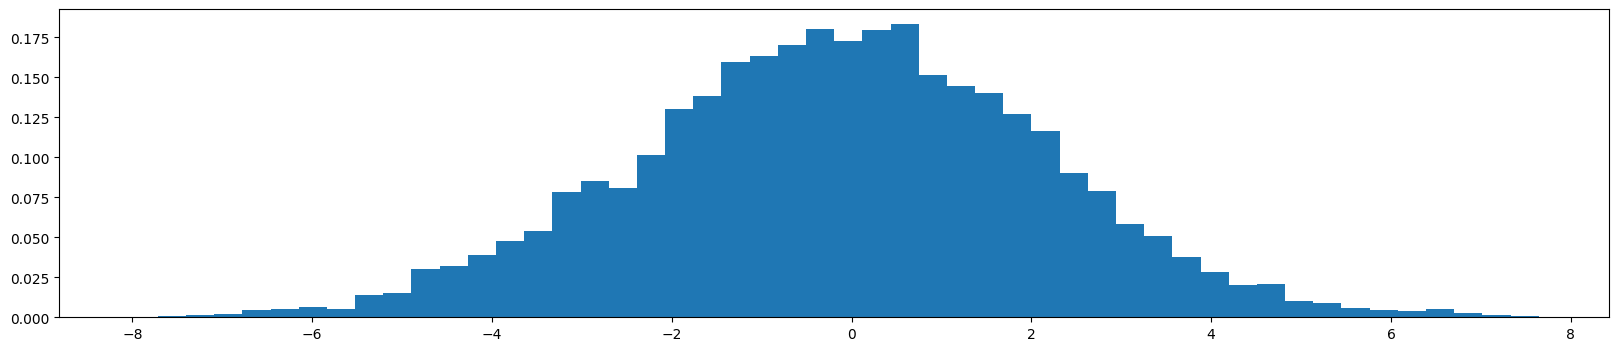

In [ ]:
plt.hist(AR_simulacion, bins=50, density=True)

## Funciones de autocorrelación y autocorrelación parcial

## Paréntesis cultural: método .shift() en DataFrames

In [ ]:
muestra = pd.DataFrame({'Series_tiempo':[2,3,6,1,8,5,4,4,2,3,1]})
muestra

,Series_tiempo
0,2
1,3
2,6
3,1
4,8
5,5
6,4
7,4
8,2
9,3


In [ ]:
muestra['1_tiempo'] = muestra.shift()

In [ ]:
muestra

,Series_tiempo,1_tiempo
0,2,NaN
1,3,2.0
2,6,3.0
3,1,6.0
4,8,1.0
5,5,8.0
6,4,5.0
7,4,4.0
8,2,4.0
9,3,2.0


In [ ]:
muestra['2_tiempo'] = muestra.Series_tiempo.shift(2)

In [ ]:
muestra

,Series_tiempo,1_tiempo,2_tiempo
0,2,NaN,NaN
1,3,2.0,NaN
2,6,3.0,2.0
3,1,6.0,3.0
4,8,1.0,6.0
5,5,8.0,1.0
6,4,5.0,8.0
7,4,4.0,5.0
8,2,4.0,4.0
9,3,2.0,4.0


# Fin del parentesis cultural

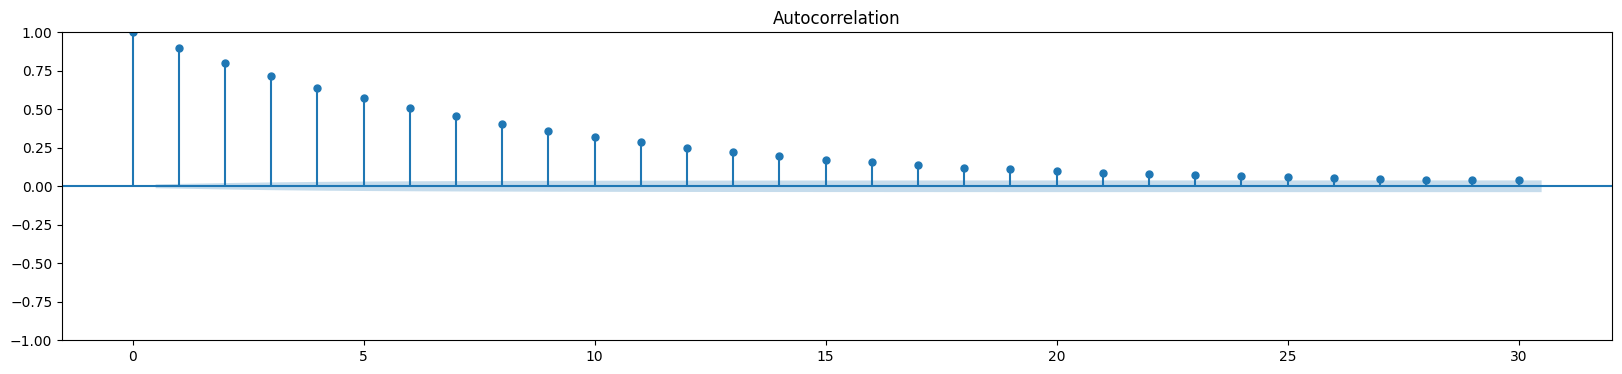

In [ ]:
# Función de autocorrelación
plot_acf(AR_simulacion,   alpha=0.2, lags=30)
plt.show()

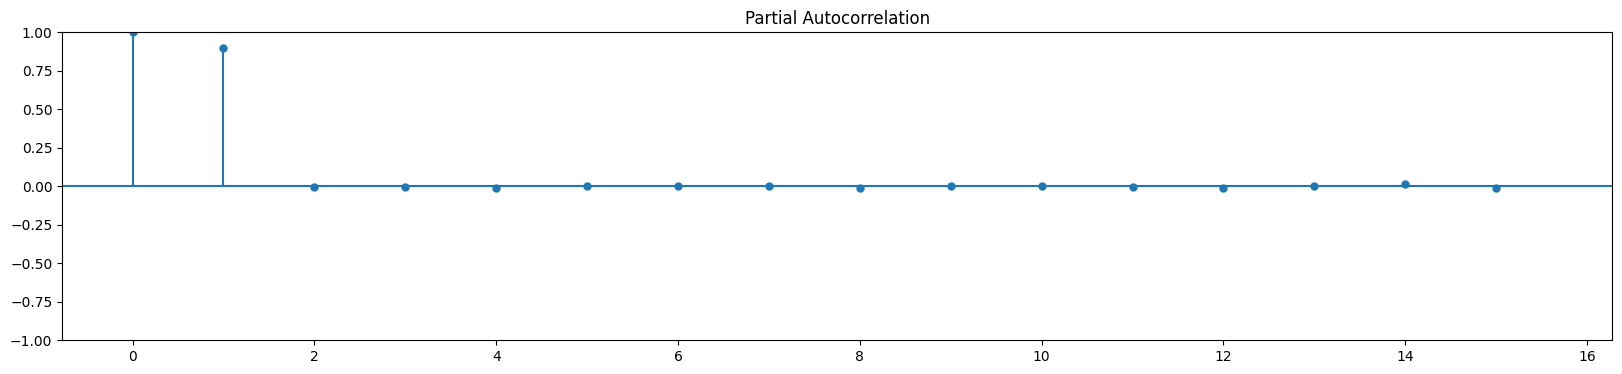

In [ ]:
# Función de autocorrelación parcial
plot_pacf(AR_simulacion, alpha=1, lags=15)
plt.show()

# Simulación de serie de tiempo Medias Móviles (MA)

$$ x_t = \alpha_{(t-1)} x_{(t-1)} + \beta_{(t-1)} \epsilon_{(t-1)} + \beta_{(t-2)} \epsilon_{(t-2)}$$

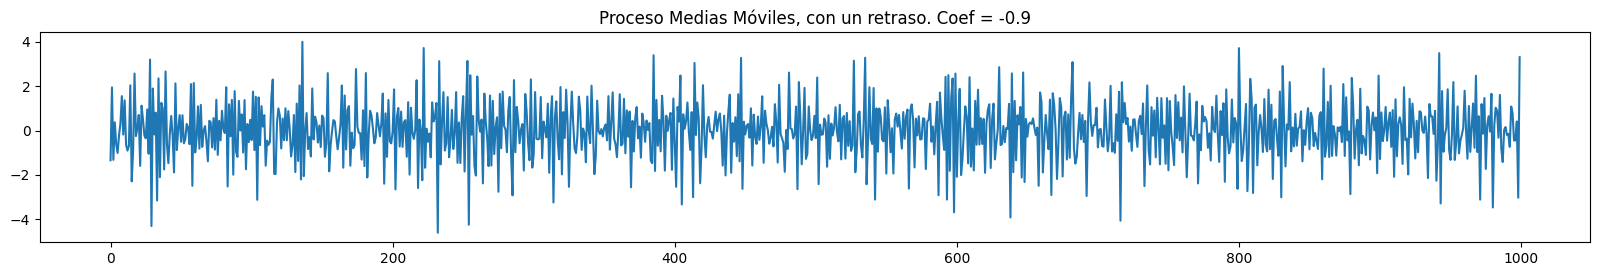

In [ ]:
coef = -0.9
plt.subplot(2,1,1)

# PARTE DEL AR o MA
ar = np.array([1])
ma = np.array([1, coef])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=1000))
MA_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

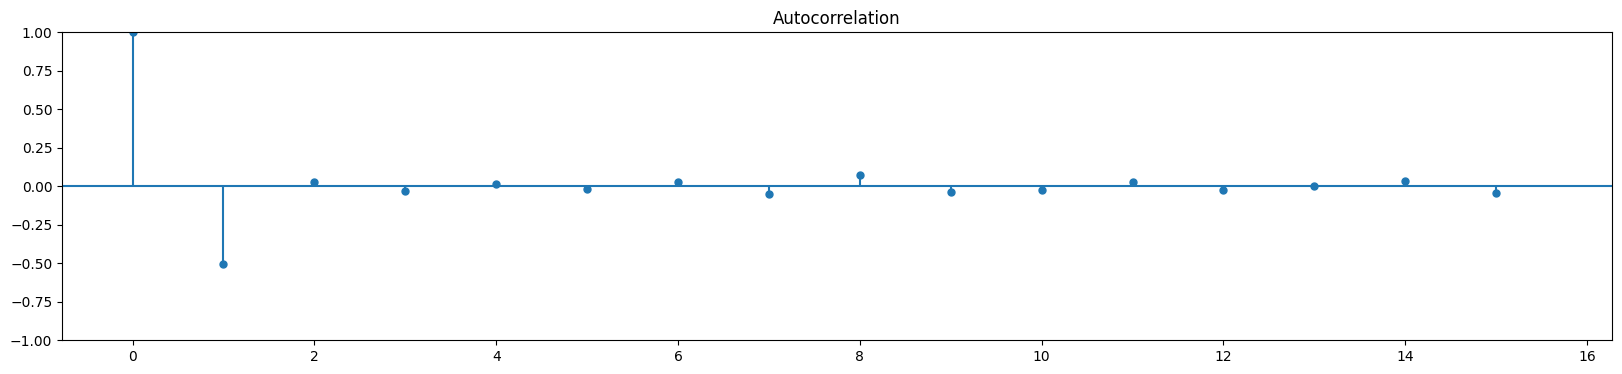

In [ ]:
# Función de autocorrelación
plot_acf(MA_simulacion, alpha=1, lags=15)
plt.show()

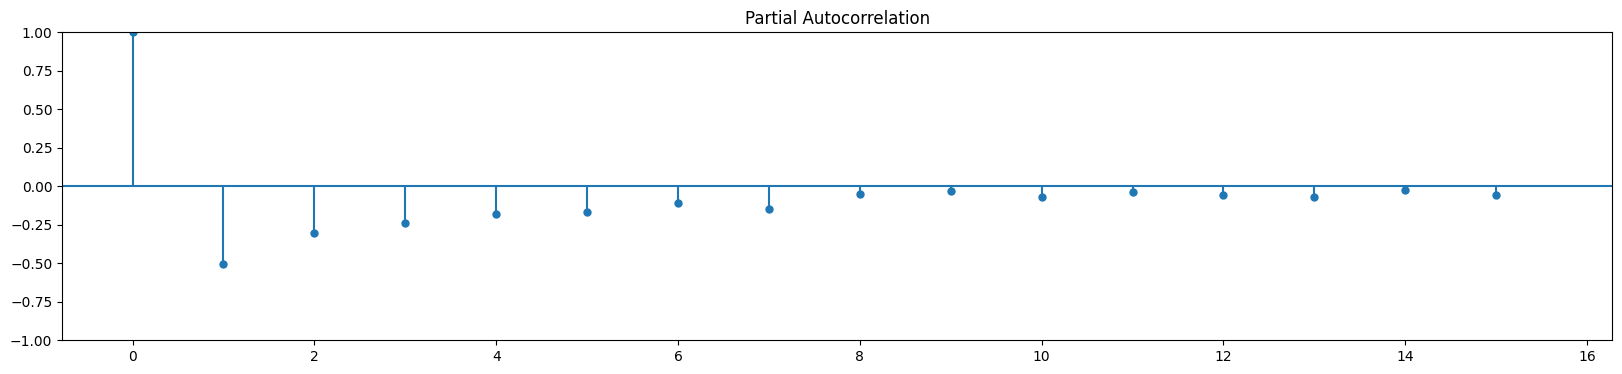

In [ ]:
plot_pacf(MA_simulacion, alpha=1, lags=15)
plt.show()

# Otro parentesis cultural

In [ ]:
hoy = 12
ayer = 10

In [ ]:
# Retornos
hoy/ayer - 1

0.19999999999999996

In [ ]:
# Retornos logaritmicos
np.log(hoy/ayer)

0.1823215567939546

In [ ]:
muestra2 = pd.DataFrame({'Series_tiempo':[2,3,6,1,8,5,4,4,2,3,1]})

In [ ]:
muestra2

,Series_tiempo
0,2
1,3
2,6
3,1
4,8
5,5
6,4
7,4
8,2
9,3


In [ ]:
muestra2.pct_change()

,Series_tiempo
0,NaN
1,0.500000
2,1.000000
3,-0.833333
4,7.000000
5,-0.375000
6,-0.200000
7,0.000000
8,-0.500000
9,0.500000


# Fin parentesis cultural

# Preguntas:

1. ¿Porqué creen que sea mas fácil detectar un proceso AR que uno MA?

2. ¿Puede un proceso ser AR y MA al mismo tiempo?

3. ¿En qué problema podrían aplicarlo?

4. ¿Que ventajas y desventajas tiene este modelado?